In [1]:
from pycbc.mchirp_area import calc_probabilities
from scipy.optimize import minimize, basinhopping, dual_annealing
from pycbc.conversions import mass1_from_mchirp_q, mchirp_from_mass1_mass2
from pycbc.cosmology import redshift

def mass1_from_mchirp_mass2(mchirp, mass2):
    b = mass2
    c = mchirp
    
    d = (27 * b ** 5 - 4 * c ** 5)
    e = (b ** 9 * c ** 10 * d) ** 0.5
    f = (9 * b ** 7 * c ** 5 + (3 ** 0.5) * e)
    
    return (
    (2 ** (2 / 3) * 3 ** (1 / 3) * b ** 3 * c ** 5 +
     (f ** (1 / 3)) ** 2) /
    (2 ** (1 / 3) * 3 ** (2 / 3) * b ** 3 *
     f ** (1 / 3))
    )

args = {'mass_limits': {'max_m1':45.0, 'min_m2':1.0},
        'mass_bdary':{'ns_max': 3.0, 'gap_max': 3.0},
        'estimation_coeff':{'a0': 0.74899, 'b0':-0.51557, 
                            'b1':-0.322195, 'm0':.01},
        'lal_cosmology':True,
        'mass_gap':False,
        'mass_gap_separate':False}



targets = {
"S230518h": {"BNS": 0.0, "NSBH": 0.8642645059209272, "BBH": 0.036717034905487424, "Terrestrial": 0.09901845917358532}, 
"S230627c": {"BNS": 0.0, "NSBH": 0.4921113127134195, "BBH": 0.47773453167609714, "Terrestrial": 0.030154155610483402},
"S230529ay": {"BNS": 0.30601513334446906, "NSBH": 0.6240278234757632, "BBH": 0.0, "Terrestrial": 0.0699570431797677},
"S240422ed":{"BNS": 0.046237686084394596, "NSBH": 0.01984946298786521, "BBH": 0.0, "Terrestrial": 0.9339128509277402},
}
classes = ['BNS', 'BBH', 'NSBH']

mchirp = []

for source in targets:

    target = targets[source]
    
    ptotal = sum([target[k] for k in classes])
    target = {k:target[k] / ptotal for k in classes}
    print(target)

    def findme(x):
        mc, snr, dist = x
        v = calc_probabilities(mc, snr, dist, args)
        met = 0
        for k in target:
            if target[k] != 0:
                met += abs((v[k] - target[k]) / target[k])**2.0
        return met

    guess = {
    "S230518h": (2.7, 10, 280),
    "S230627c":  (5.0, 15,  291),
    "S230529ay": (1.9, 10 , 200),
    "S240422ed": (1.8, 10, 200),
    }
    r = minimize(findme, x0=guess[source],
                  method='BFGS', tol=1e-20)
    #r = basinhopping(findme, x0=(2.0207, 11, 221))
    #r = dual_annealing(findme, bounds=[(1, 5), (8, 30), (40, 1000)])
    print(calc_probabilities(r['x'][0], r['x'][1], r['x'][2], args))
    mc = r['x'][0]
    z = redshift(r['x'][2]) # This won't be fit so well but the source one will
    
    src_mc = mc / (1 + z) 


    mchirp.append((source, src_mc))
    #print(r)
    print(source, src_mc, mc, r['x'], r['fun'])

/home/ahnitz/projects/env/lib64/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


{'BNS': 0.0, 'BBH': 0.04075226099727766, 'NSBH': 0.9592477390027224}
{'BNS': 0.0, 'NSBH': 0.9592477407138363, 'BBH': 0.040752259286163654}
S230518h 2.728734164487942 2.8938660140569175 [  2.89386601   9.99975301 279.99995484] 1.766190750421543e-15
{'BNS': 0.0, 'BBH': 0.49258811020303334, 'NSBH': 0.5074118897969667}
{'BNS': 0.0, 'NSBH': 0.5074118897916714, 'BBH': 0.4925881102083286}
S230627c 5.957818978478762 6.331926678297987 [  6.33192668  14.99999402 290.99893609] 2.2446880172484156e-22
{'BNS': 0.3290333323857627, 'BBH': 0.0, 'NSBH': 0.6709666676142373}
{'BNS': 0.32903333226590353, 'NSBH': 0.6709666677340964, 'BBH': 0.0}
S230529ay 1.907505780901139 1.990948583948399 [  1.99094858   9.9999995  199.99995679] 1.646085091802165e-19
{'BNS': 0.6996471588423072, 'BBH': 0.0, 'NSBH': 0.30035284115769273}
{'BNS': 0.6996471586450689, 'NSBH': 0.3003528413549311, 'BBH': 0.0}
S240422ed 1.5921305155520387 1.661777411060902 [  1.66177741   9.99999978 199.99999215] 5.107142765927699e-19


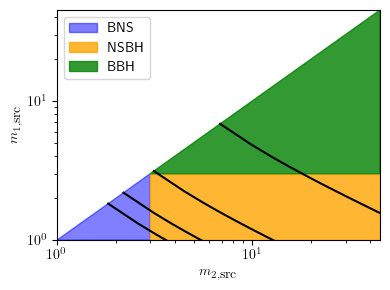

In [2]:
import numpy
from matplotlib import pyplot as plt
from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q

plt.rc('text', usetex=True)
plt.figure(figsize=[4, 3])

x = [1, 3, 3, 1]
y = [1, 3, 1, 1]
plt.fill(x, y, c='blue', label='BNS', alpha=0.5)

x = [3, 45, 45, 3]
y = [3, 3, 1, 1]
plt.fill(x, y, c='orange', alpha=0.8, label='NSBH')

x = [3, 45, 45, 3]
y = [3, 45, 3, 3]
plt.fill(x, y, c='green', alpha=0.8, label='BBH')

plt.xlim(1, 45)
plt.ylim(1, 45)

q = numpy.arange(1, 30)

for source, mc in mchirp:
    m1 = mass1_from_mchirp_q(mc, q)
    m2 = mass2_from_mchirp_q(mc, q)
    plt.plot(m1, m2, c='black')

plt.legend()
plt.ylabel('$m_{1, \\textrm{src}}$')
plt.xlabel('$m_{2, \\textrm{src}}$')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('chirpest.pdf')